In [ ]:
#@title Installs

!pip install datasets --quiet

In [ ]:
#@title Imports

import numpy as np

import pandas as pd
import os

import matplotlib.pyplot as plt

import re

from datasets import load_dataset


In [ ]:
#@title Loading dataset

# Load the dataset
npc_train = load_dataset("amaydle/npc-dialogue", split="train")
npc_test = load_dataset("amaydle/npc-dialogue", split="test")

# Automatically splits it into train and test for you - let's ignore that for now and just combine them as one

# First, transform them into pandas DFs
train = pd.DataFrame(data = {'name': npc_train['Name'], 'bio':npc_train['Biography'], 'query':npc_train['Query'], 'response':npc_train['Response'], 'emotion':npc_train['Emotion']})
test = pd.DataFrame(data = {'name': npc_test['Name'], 'bio':npc_test['Biography'], 'query':npc_test['Query'], 'response':npc_test['Response'], 'emotion':npc_test['Emotion']})

# Now combine into a single df
npc = pd.concat([train, test])
npc

,name,bio,query,response,emotion
0,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on friendship?,Friendship is a bond stronger than blood.,Loyalty
1,Arcturus the Bounty Hunter,Arcturus is a fearless bounty hunter who has m...,What made you become a bounty hunter?,I believe in justice and making the world a sa...,Purpose
2,Elena Gilbert,Elena Gilbert is a teenage girl from the town ...,Can you tell me about Elena's role in Mystic F...,Elena is often caught in the middle.,Neutral
3,Arin the Cleric,Arin is a devoted follower of the god of light...,Have you ever faced a great challenge in your ...,"Yes, I've faced trials that tested my beliefs.",Determination
4,Scott McCall,Scott McCall is a teenage werewolf and the mai...,Can you tell me about your transformation?,"""Bitten, changed, became werewolf.""",Acceptance
...,...,...,...,...,...
187,Marcella Ravenwood,Marcella Ravenwood is a powerful sorceress who...,Do you have any magical artifacts that you che...,"Yes, I have a magical tome that has been passe...",Sentimental
188,Lyra Dawnstrider,Lyra Dawnstrider is a high-elf ranger from the...,What is your ultimate goal in life?,"To see the natural world flourish, long after ...",Peacefulness
189,Sailor Moon,"Sailor Moon is the protector of the galaxy, de...",What is the most challenging battle you've fou...,"Against Queen Nehelenia, she was a tough oppon...",Triumphant
190,"Arn, the Knight Templar","Arn is a highly skilled and honorable knight,",Have you ever made a difficult decision?,"""Difficult decisions, for the greater good.""",Conviction


(1915, 5)
               name                                                bio
41  Aria Nightshade  A skilled assassin with a dark past. Aria grew...
59  Aria Nightshade  Aria Nightshade is a skilled archer and rogue ...
(102, 2)


<ipython-input-38-0944fe2c8073>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_level_dataset.drop_duplicates(inplace=True)
<ipython-input-38-0944fe2c8073>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_level_dataset['bio_list'] = character_level_dataset['bio'].apply(lambda x: x.split(' '))
<ipython-input-38-0944fe2c8073>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

array([[<Axes: title={'center': 'bio_len'}>]], dtype=object)

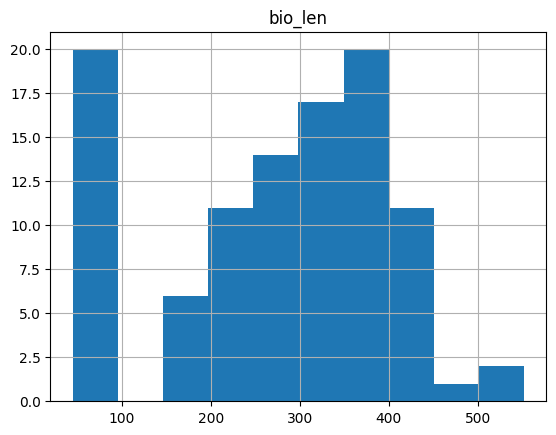

In [ ]:
#@title Bios

# Number of observations
print(npc.shape)

# Length of bio

# Create a character-level dataset, since the characters show up multiple times in the dataset
character_level_dataset = npc[['name', 'bio']]
character_level_dataset.drop_duplicates(inplace=True)

# Now confirm that name is a unique id (ie only one bio per character)
dupes = character_level_dataset.duplicated(subset=['name'], keep=False)
print(character_level_dataset[dupes])

# Check the number of unique characters
print(character_level_dataset.shape)
# 101 (102-1 since one observation is a duplicate character)

# Only one character has two different bios - since it's only one we'll ignore it for now

# Distribution of the length of the bio
character_level_dataset['bio_list'] = character_level_dataset['bio'].apply(lambda x: x.split(' '))
character_level_dataset['bio_len'] = character_level_dataset['bio'].apply(lambda x: len(x))

character_level_dataset.hist(column='bio_len')

(286, 2)


<Axes: xlabel='emotion'>

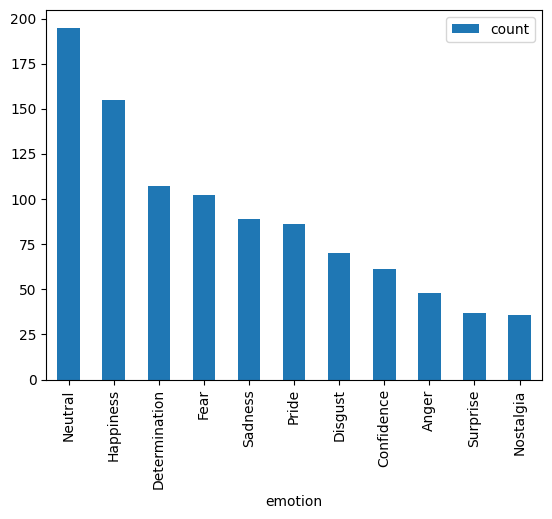

In [ ]:
#@title Emotion

# Number of observations per emotion
emotion_dist = npc.groupby(['emotion']).size().reset_index().rename(columns={0:'count'})

# How many unique emotions?
print(emotion_dist.shape)
# 286 - let's just show the top 10 emotions

emotion_dist.sort_values(by='count', inplace=True, ascending=False)
emotion_dist = emotion_dist.reset_index()
# Bar chart!
top_ten = emotion_dist.loc[0:10]
top_ten.plot.bar(x='emotion', y='count')

array([[<Axes: title={'center': 'count'}>]], dtype=object)

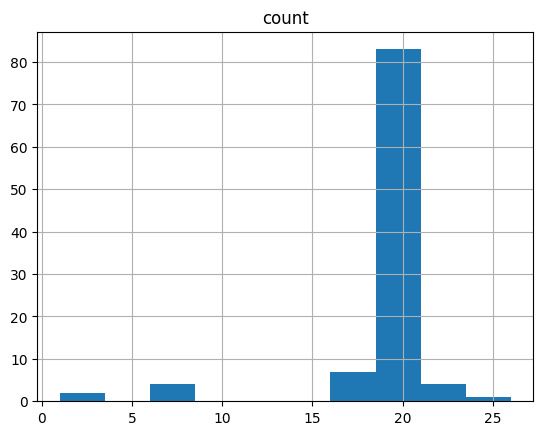

In [ ]:
#@title Characters

# Number of observations per character
char_num_obs = npc.groupby('name').size().reset_index().rename(columns={0:'count'})

# Plot the distribution
char_num_obs.hist(column='count')


array([[<Axes: title={'center': 'response_len'}>]], dtype=object)

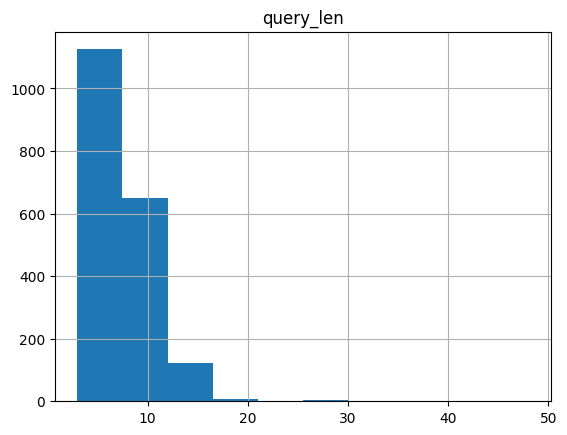

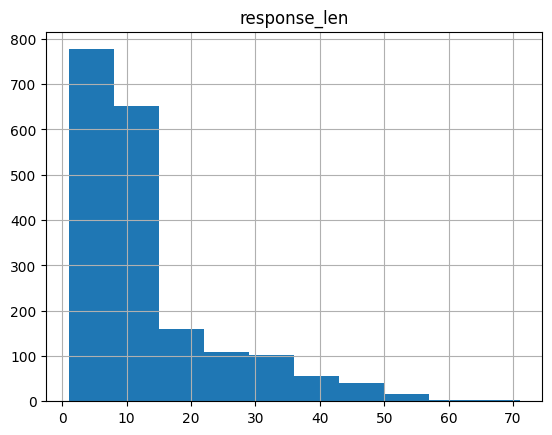

In [ ]:
#@title Queries and responses

# Distribution of the query length
npc['query_list'] = npc['query'].apply(lambda x: x.split(' '))
npc['query_len'] = npc['query_list'].apply(lambda x: len(x))
npc.hist(column='query_len')

# Distribution of the response length
npc['response_list'] = npc['response'].apply(lambda x: x.split(' '))
npc['response_len'] = npc['response_list'].apply(lambda x: len(x))
npc.hist(column='response_len')
